In [11]:
import pandas as pd
from google.colab import auth
import gspread
from google.auth import default

In [12]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
tf.__version__

'2.15.0'

In [18]:
worksheet = gc.open('datasetforex1').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])

In [19]:
df.head()


,input,output
0,1,3
1,2,5
2,3,7
3,4,9
4,5,11


df[['input', 'output']] = df[['input', 'output']].astype(float)

In [21]:
X=df[['input']].values
y=df[['output']].values

In [22]:
X


array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

y

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=50)


In [26]:
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_train_scaled

array([[0.11764706],
       [1.        ],
       [0.58823529],
       [0.70588235],
       [0.29411765],
       [0.35294118],
       [0.23529412],
       [0.82352941],
       [0.05882353],
       [0.76470588],
       [0.64705882],
       [0.        ],
       [0.94117647]])

In [27]:
ai_brain = Sequential([
    Dense(2,activation='relu'),
    Dense(1)
])


In [28]:
ai_brain.compile(optimizer='rmsprop',loss='mse')

In [29]:
ai_brain.fit(x=x_train_scaled,y=y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 593ms/step - loss: 526.4421
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 526.2175
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 526.0529
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 525.9145
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 525.7910
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 525.6774
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 525.5709
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 525.4697
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 525.3724
Epoch 10/2000
1/1 [==============================] - 0s 14ms/step - loss: 525.2783
Epoch 11/2000
1/1 [==============================] - 0s 8ms/step - loss: 525.1868
Epoch 12/2000
1/1 [==============================] - 0s 12ms/step - loss: 525.0975
Epoch 13/2000
1/1 [

loss_df=pd.DataFrame(ai_brain.history.history)
loss_df.plot()
import matplotlib.pyplot as plt
plt.title("Iteration vs Loss")

Text(0.5, 1.0, 'Iteration vs Loss')

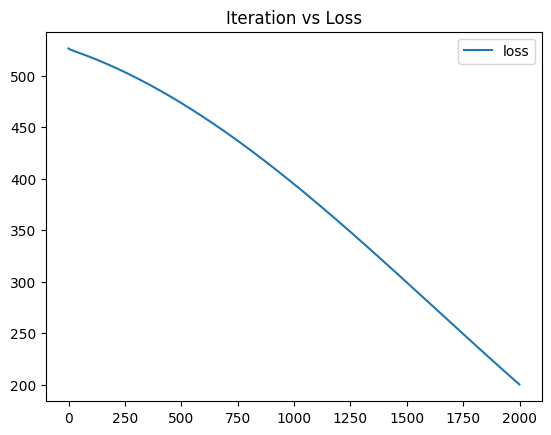

In [31]:
loss_df=pd.DataFrame(ai_brain.history.history)
loss_df.plot()
import matplotlib.pyplot as plt
plt.title("Iteration vs Loss")

In [32]:
x_test

array([[16.],
       [ 9.],
       [10.],
       [19.],
       [ 4.],
       [20.],
       [ 8.]])

In [33]:
x_test_scaled=scaler.transform(x_test)
x_test_scaled

array([[0.88235294],
       [0.47058824],
       [0.52941176],
       [1.05882353],
       [0.17647059],
       [1.11764706],
       [0.41176471]])

In [34]:
ai_brain.evaluate(x_test,y_test)

1/1 [==============================] - 0s 122ms/step - loss: 2687.3198


2687.31982421875

In [35]:
input=[[4000]]
input_scaled=scaler.transform(input)
input_scaled.shape

(1, 1)

In [36]:
input_scaled

array([[235.23529412]])

In [37]:
ai_brain.predict(input_scaled)

1/1 [==============================] - 0s 85ms/step


array([[1286.8839]], dtype=float32)